____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521__<br/>
__Aprendizaje supervisado: clasificacion__<br/>
__Elaborado por: Martin Palazzo__
____

### **Contexto del problema**

Supongamos que tenemos un dataset de 2 features y 2 clases. Una clase es nuestras muestras de control y otra clase es la muestra de tratamiento. Supongan que quisieramos encontrar un modelo clasificador que logre discriminar entre ambas clases. 

In [40]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importamos librerias de scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import preprocessing

#### **1) creamos un dataset sintetico con Scikit Learn compuesto de 2 clases**
El dataset esta compuesto de de 2 variables y 100 muestras con la funcion de sklearn "make classification". De todos modos pueden modificar estos parametros para generar distintos datasets. Por esta razon es que no es necesario importar un .csv, ya que el dataset esta generado sinteticamente.


In [93]:

# cantidad de muestras 
nsamples = 200

# cantidad de features
nfeatures = 2

x, y = make_classification(n_samples = nsamples, n_features=nfeatures, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep = 0.7)

In [94]:
type(x)

numpy.ndarray

In [95]:
x.shape

(200, 2)

In [96]:
type(y)

numpy.ndarray

### **Visualizamos el dataset**

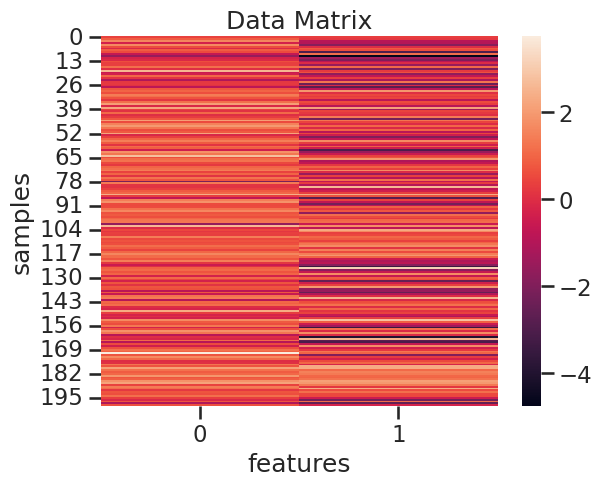

In [97]:
# visualizamos la matriz de variables
sns.heatmap(x)
plt.ylabel('samples')
plt.xlabel('features')
plt.title('Data Matrix')
plt.show()

In [98]:
# observamos el vector de labels
y

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1])

/tmp/ipykernel_12845/4155974129.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = x[:,0], y = x[:,1], c = y, palette = "Paired")
/tmp/ipykernel_12845/4155974129.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


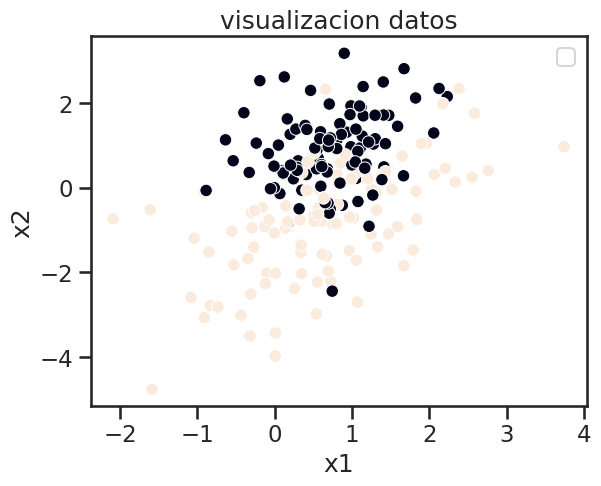

In [99]:
# al ser un dataset de 2 dimensiones podemos visualizarlo con un scatterplot
sns.set_context('talk')
sns.scatterplot(x = x[:,0], y = x[:,1], c = y, palette = "Paired")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('visualizacion datos')
plt.legend()
plt.show()

In [100]:
# calculamos la matriz de correlacion 
corr_matrix = np.corrcoef(x.T)
corr_matrix

array([[1.       , 0.4202613],
       [0.4202613, 1.       ]])

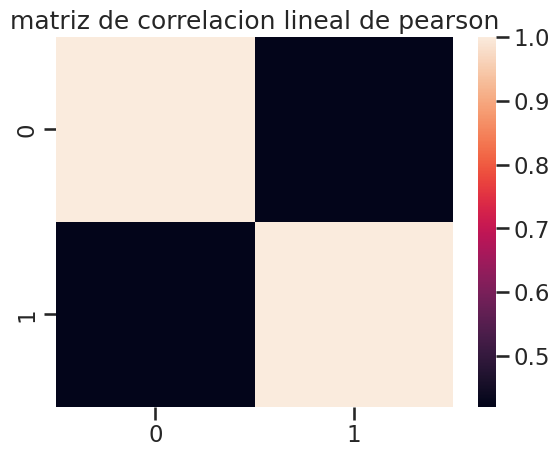

In [101]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(corr_matrix)
plt.title('matriz de correlacion lineal de pearson')
plt.show()

### **Preparamos los datos para aprendizaje supervisado: clasificacion**

In [102]:
# obtenemos xtrain, xtest, ytrain e ytest :) 
# en este caso las muestras de test son el 20% del dataset. 
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2, random_state=4)

In [103]:
# verificamos las dimensiones de la matriz de train
xtr.shape

(160, 2)

In [104]:
xte.shape

(40, 2)

In [105]:
# declaramos un standard scaler y lo ajustamos a los datos de entrenamiento
scaler = preprocessing.StandardScaler().fit(xtr)

In [106]:
# transformamos nuestros datos de entrenamiento y de test con la regla de scaling que aprendimos en el paso anterior
xtr_scal = scaler.transform(xtr)  
xte_scal = scaler.transform(xte)

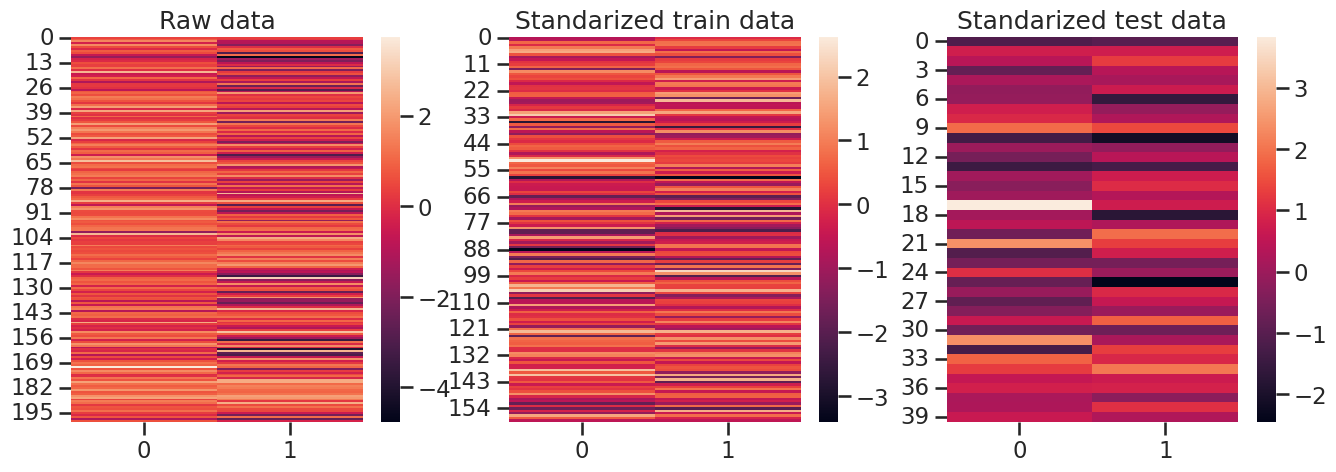

In [107]:
# visualizamos como queda el dataset pre y post scaling tanto en train como en test
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtr_scal, ax = axs[1])
sns.heatmap(xte_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')
plt.show()

### **Entrenamiento del modelo de clasificacion**

In [108]:
# defino un modelo de clasificacion, en este caso un Logistic Regression importado de scikit learn
lr = LogisticRegression()

# realizo un cross validation de 5 folds para ver la performance del modelo con distintas particiones de entrenamiento
cv_results = cross_validate(lr, xtr_scal, ytr, cv=5)

In [109]:
# analizamos los resultados de cada iteracion del cross validation. 
# Este objeto indica el tiempo que tomo cada iteracion, y en "test_score" cuanto dio el resultado de accuracy
cv_results

{'fit_time': array([0.00315809, 0.00224853, 0.00252891, 0.00201631, 0.00238538]),
 'score_time': array([0.00073743, 0.00059557, 0.00056601, 0.0006454 , 0.0007906 ]),
 'test_score': array([0.875  , 0.75   , 0.84375, 0.875  , 0.71875])}

In [110]:
# estudiamos como fue el promedio de todos los accuracys a lo largo de todas las iteraciones de cross validation
np.mean(cv_results['test_score'])

0.8125

In [111]:
# Ahora entreno mi modelo utilizando todas las muestras de training utilizando tanto Xtrain como Ytrain
lr.fit(xtr_scal, ytr) 

LogisticRegression()

In [112]:
# observamos los coeficientes W del modelo luego del entrenamiento, un coeficiente por cada feature
lr.coef_

array([[ 0.42047772, -2.31752554]])

In [113]:
# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = lr.predict(xte_scal)

In [114]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(yte, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.75


In [115]:
#compute and plot Area Under The Curve (AUC)
yproba = lr.predict_proba(xte_scal)
fpr1, tpr1, thresholds = roc_curve(yte.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.8312020460358056


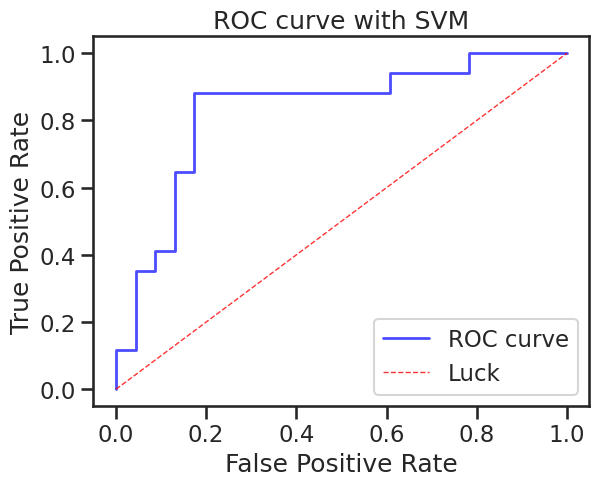

In [116]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with SVM')
plt.show()

In [117]:
# Compute confusion Matrix
cm = confusion_matrix(yte, ypred)
cm

array([[19,  4],
       [ 6, 11]])

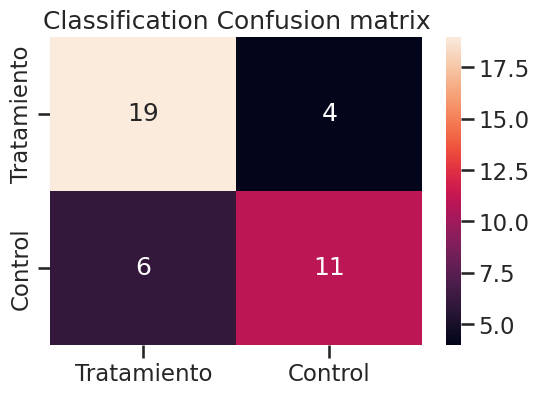

In [118]:
df_cm = pd.DataFrame(cm, index = ['Tratamiento', 'Control'], columns = ['Tratamiento', 'Control'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

### **Tarea y proximos pasos**
Repetir el ejecicio aunque esta vez con mas cantidad de features y distintas cantidades de muestras. Analizar como se comporta el clasificador y su performance.

In [ ]:
### codigo aqui ###

In [ ]:
### codigo aqui ###

In [ ]:
### codigo aqui ###

In [ ]:
### codigo aqui ###

In [ ]:
### codigo aqui ###